## 쇼핑몰 데이터 분석 프로젝트
# 선택3. 쇼핑몰 데이터 분석

https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset

- Customer Purchase Patterns and Demographics
- [Kaggle의 Wallmart 데이터 셋](https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset)  walmart.csv
- 데이터 전처리, 탐색적 데이터 분석(EDA)을 통한 데이터의 분포 확인
- VIP 고객 도출 및 지역별 구매 고객 특징을 파악하여 마케팅 전략을 도출
- 데이터 상세: 약 55만개의 사용자 거래 내역과 10개의 특징(550068, 10)

In [1]:
## 데이터 로드

import pandas as pd
import numpy as np

df = pd.read_csv('../../data/data_anal_proj/walmart.csv')
df.head() 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('../../data/data_anal_proj/walmart.csv')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# [[추가!!]] VIP와 VVIP를 미리 추출
user_purchase = df.groupby('User_ID').agg({
    'Purchase': 'sum',
    'Gender': 'first',
    'Age': 'first',
    'Occupation': 'first',
    'City_Category': 'first',
    'Stay_In_Current_City_Years': 'first',
    'Marital_Status': 'first'
}).reset_index()

vvip_users = user_purchase.nlargest(30, 'Purchase') #구매액 상위 30명
vip_users = user_purchase.nlargest(300, 'Purchase') #구매액 상위 300명
df_uniq_index = df.copy().set_index('User_ID')

In [5]:
df.info() #컬럼의 개수 및 종류 그리고 각 컬럼의 데이터 타입 동시에 확인, null은 없는 것으로 보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
## 삭제할 컬럼 선택 : ID정보는 제품의 판매 동향, 소비자 성향 등과 관련이 없으므로 제외
df = df.drop(columns=['User_ID','Product_ID'])
df.info() #삭제된 것 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
 5   Marital_Status              550068 non-null  int64 
 6   Product_Category            550068 non-null  int64 
 7   Purchase                    550068 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 33.6+ MB


In [9]:
print(df.describe(include='object')) #문자형 컬럼에 대한 정보들도 종합적으로 확인

        Gender     Age City_Category Stay_In_Current_City_Years
count   550068  550068        550068                     550068
unique       2       7             3                          5
top          M   26-35             B                          1
freq    414259  219587        231173                     193821


In [11]:
# Age 열 범주형 값을 숫자형으로 변환, 가시성을 위해 매핑으로 진행,
df['Age'] = df['Age'].map({'0-17': 1,'18-25': 2,'26-35': 3,'36-45': 4,'46-50': 5,'51-55': 6,'55+': 7})  
df['Gender'] = df['Gender'].map({'M': 0,'F': 1})  #
df['City_Category'] = df['City_Category'].map({'A': 1,'B': 2,'C': 3})  
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace("4+", 4).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int64
 1   Age                         550068 non-null  int64
 2   Occupation                  550068 non-null  int64
 3   City_Category               550068 non-null  int64
 4   Stay_In_Current_City_Years  550068 non-null  int32
 5   Marital_Status              550068 non-null  int64
 6   Product_Category            550068 non-null  int64
 7   Purchase                    550068 non-null  int64
dtypes: int32(1), int64(7)
memory usage: 31.5 MB


In [13]:
### 시각화 ###

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df.info() #결측값 없는 것 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int64
 1   Age                         550068 non-null  int64
 2   Occupation                  550068 non-null  int64
 3   City_Category               550068 non-null  int64
 4   Stay_In_Current_City_Years  550068 non-null  int32
 5   Marital_Status              550068 non-null  int64
 6   Product_Category            550068 non-null  int64
 7   Purchase                    550068 non-null  int64
dtypes: int32(1), int64(7)
memory usage: 31.5 MB


# 1번차트

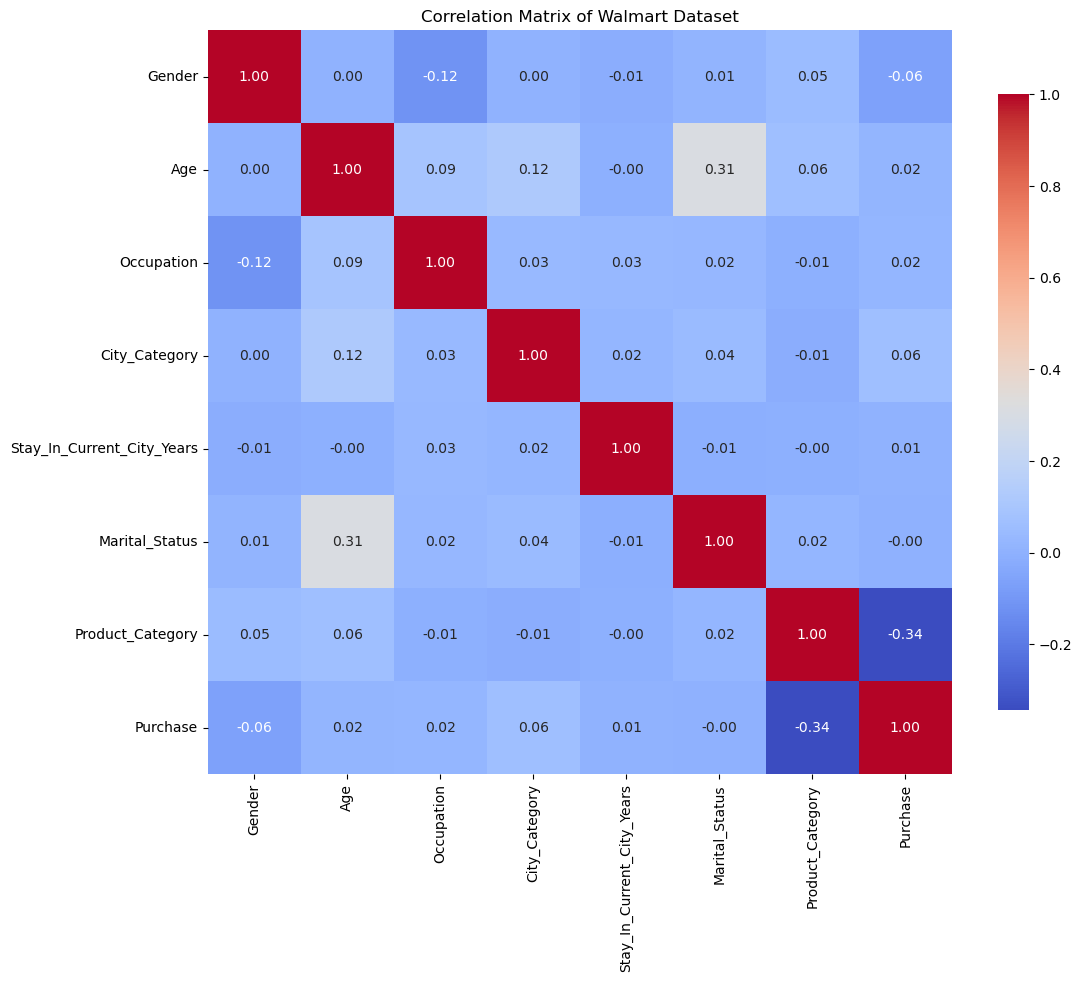

In [19]:
# 각 컬럼간의 상관관계를 히트맵으로 표현
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Walmart Dataset")
plt.show()

In [16]:
plt.rc('font', family='Malgun Gothic') #한글화

# 2번차트

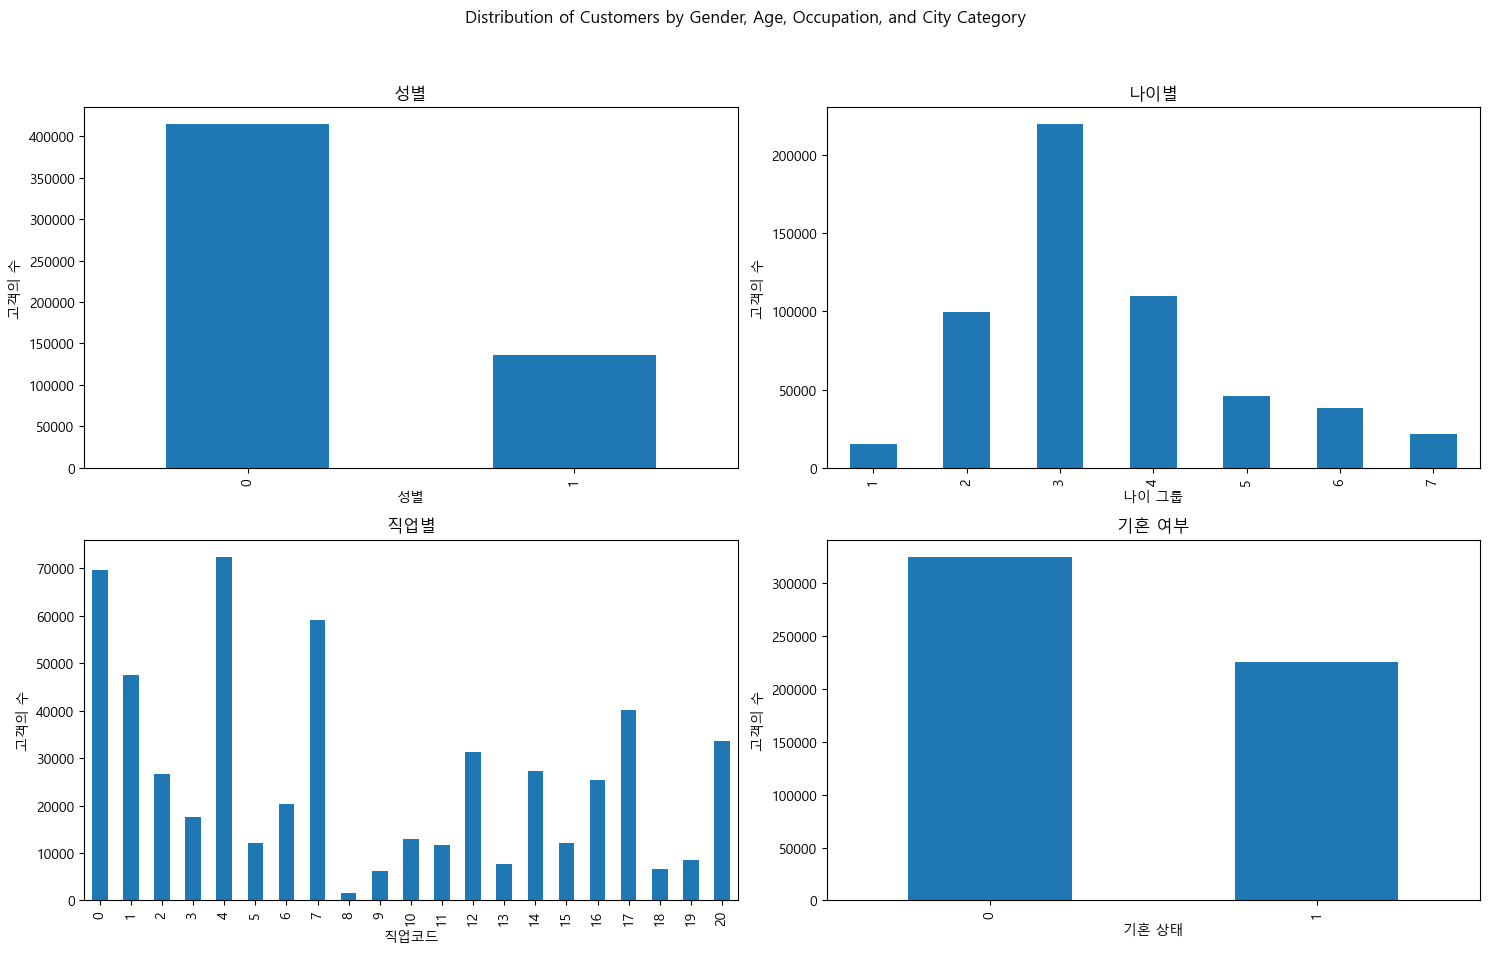

In [23]:
# 일단은 성별과 나이별, 직업별, 도시별로 어떠한 손님들이 주로 방문하는지 체크

# 그림 크기 및 레이아웃 설정
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Distribution of Customers by Gender, Age, Occupation, and City Category")

# 성별 분포
df['Gender'].value_counts().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('성별')
axs[0, 0].set_xlabel('성별')
axs[0, 0].set_ylabel('고객의 수')

# 연령대 분포
df['Age'].value_counts().sort_index().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('나이별')
axs[0, 1].set_xlabel('나이 그룹')
axs[0, 1].set_ylabel('고객의 수')

# 직업 분포
df['Occupation'].value_counts().sort_index().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('직업별')
axs[1, 0].set_xlabel('직업코드')
axs[1, 0].set_ylabel('고객의 수')

# 기혼 여부 분포
df['Marital_Status'].value_counts().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('기혼 여부')
axs[1, 1].set_xlabel('기혼 상태')
axs[1, 1].set_ylabel('고객의 수')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Walmart 고객 분포 분석

### 1. 성별 분포
- 남성(0)이 여성(1)보다 고객 수가 약 2배 이상 많다. 이는 주 고객층이 남성임을 시사하며, 마케팅 전략 수립 시 남성 고객을 주요 타겟으로 고려할 필요가 있으며 여성 고객 제품 확대시 추가적인 매출 확대도 가능할 것으로 보인다. 

### 2. 나이별 분포
- 나이 그룹 중 26-35세(3)와 18-25세(2) 고객이 가장 많으며, 그 뒤를 36-45세(4) 고객이 잇고 있다. 이 세 그룹을 타깃으로 하는 프로모션의 효과가 클 것으로 예상, 그 외 나이대에 대한 제품군은 시장 기호를 파악하고 확대하는 것 역시 필요할 것으로 보인다. 

### 3. 직업별 분포
- 다양한 직업군에서 고객이 분포하고 있으며, 특히 0, 1, 4, 7 코드의 직업군이 많은 비율을 차지, 이를 통해 직업에 따라 구매 패턴이 다를 수 있으므로, 상위 직업군을 대상으로 한 맞춤형 마케팅 전략이 필요합니다. 즉 특정 직업군에서 선호하는 상품군을 분석하여 집중 프로모션을 진행하면 효과를 극대화할 수 있을듯

### 4. 기혼여부별 분포
- 미혼 고객이 더 많기 때문에, 이들에 맞춘 프로모션과 상품 구성이 효과적일 수 있음. 그러나 기혼 고객도 적지 않으므로, 가족 단위 또는 가정용 제품군에 대한 마케팅도 유효할 것

# 3번차트

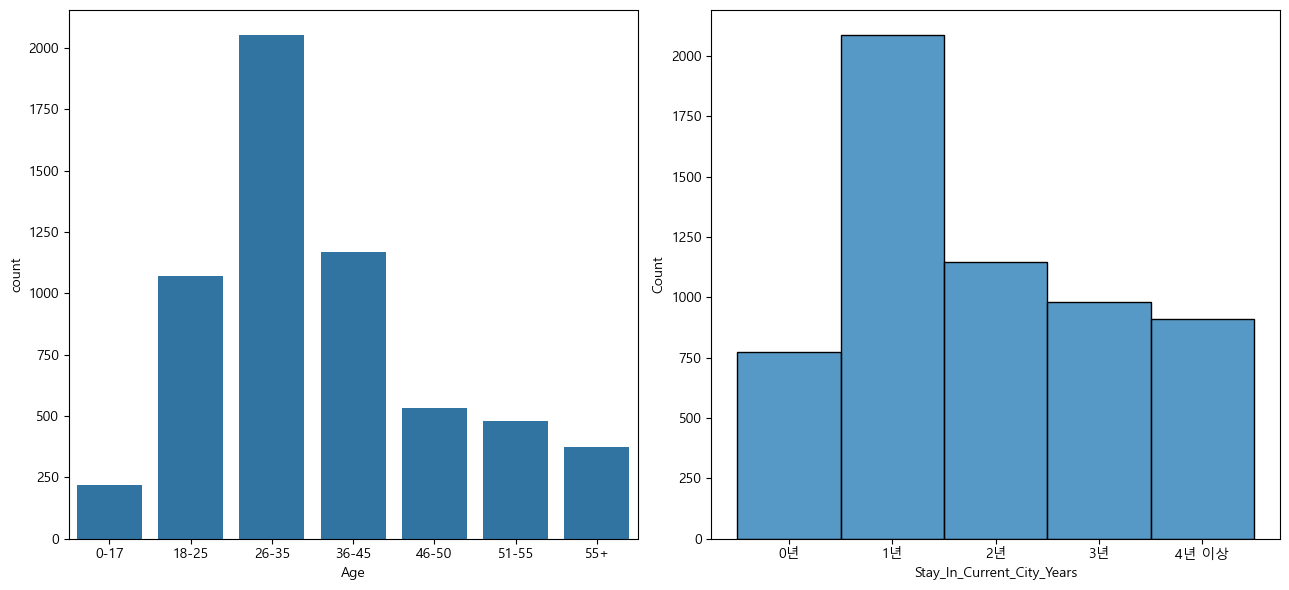

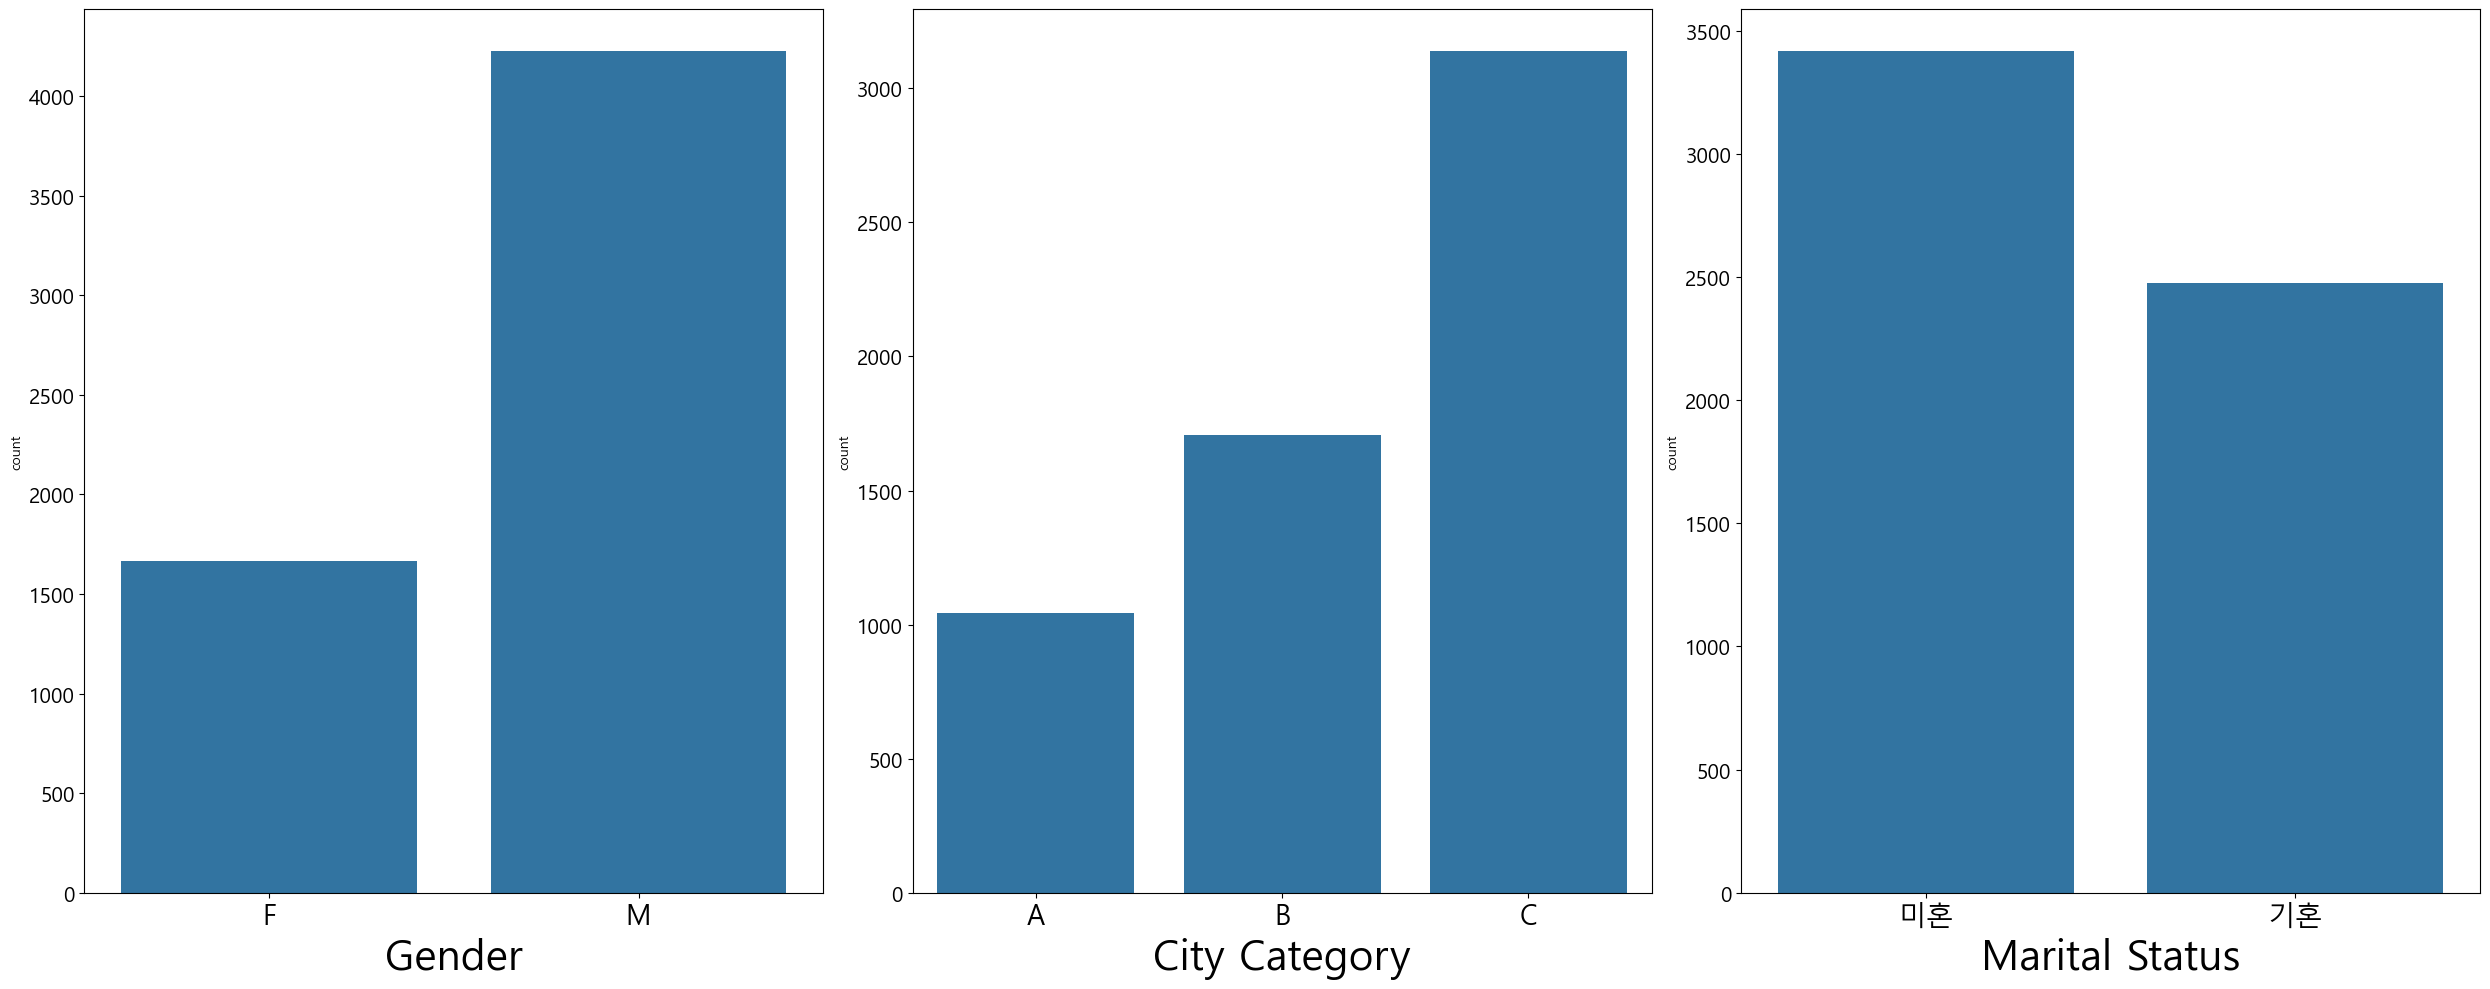

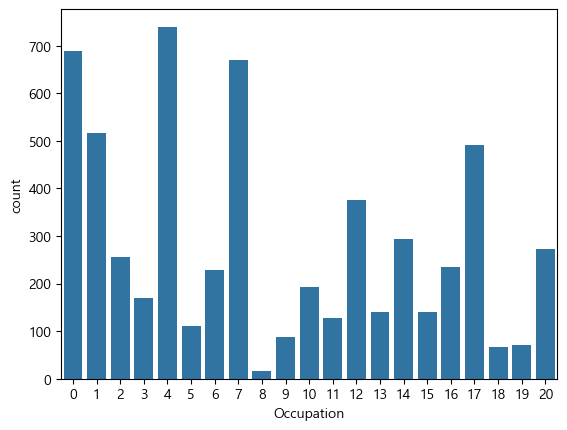

In [64]:
# 회원 중복 제외한 유니크한 값만 남기기
df_uniq = df.copy()
df_uniq = df_uniq[['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']]
df_uniq = df_uniq.drop_duplicates()

df_uniq['Stay_In_Current_City_Years'] = df_uniq['Stay_In_Current_City_Years'].replace('4+', 4)
df_uniq['Stay_In_Current_City_Years'] = df_uniq['Stay_In_Current_City_Years'].astype(int)

# 연속형 변수인 Age(?)와 Stay_In_Current_City_Years 히스토그램 
### age를 연속형 변수라 생각해서 히스토그램을 그리는걸로 했는데 이게 맞는 생각일까요?
hist, ax = plt.subplots(1,2, figsize=(13, 6))
sns.countplot(data=df_uniq, x='Age', ax = ax[0], order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
sns.histplot(data=df_uniq, x='Stay_In_Current_City_Years', ax = ax[1], discrete=True)
ax[1].set_xticks([0, 1, 2, 3, 4])
ax[1].set_xticklabels(['0년', '1년', '2년', '3년', '4년 이상'])
hist.set_tight_layout(True)
plt.show()

# 범주형 변수인 Gender와 City_Category, Marital_Status 에 대한 Count plot
count, ax = plt.subplots(1,3, figsize=(25, 10))
sns.countplot(data=df_uniq, x='Gender', ax=ax[0])
ax[0].set_xlabel('Gender', fontsize=30)
sns.countplot(data=df_uniq, x='City_Category', ax=ax[1], order=['A','B','C'])
ax[1].set_xlabel('City Category', fontsize=30)
sns.countplot(data=df_uniq, x='Marital_Status', ax=ax[2])
ax[2].set_xticks([0, 1])
ax[2].set_xticklabels(['미혼', '기혼'])
ax[2].set_xlabel('Marital Status', fontsize=30)
for axis in ax:
    axis.tick_params(axis='x', labelsize=20)
    axis.tick_params(axis='y', labelsize=15)
count.set_tight_layout(True)
plt.show()

sns.countplot(data=df_uniq, x='Occupation')
plt.show()

# Walmart 고객 분포 분석

### 1. 성별 분포
- 남성이 여성보다 고객 수가 약 2배 이상 많다. 이는 주 고객층이 남성임을 시사하며, 마케팅 전략 수립 시 남성 고객을 주요 타겟으로 고려할 필요가 있으며 여성 고객 제품 확대시 추가적인 매출 확대도 가능할 것으로 보인다. 

### 2. 나이별 분포
- 나이 그룹 중 26-35세와 36-45세 고객이 가장 많으며, 그 뒤를 18-25세 고객이 잇고 있다. 이 세 그룹을 타깃으로 하는 프로모션의 효과가 클 것으로 예상, 그 외 나이대에 대한 제품군은 시장 기호를 파악하고 신규 회원을 유입시키는 것 역시 필요할 것으로 보인다. 

### 3. 직업별 분포
- 0, 4, 7 코드의 직업군이 많은 비율을 차지, 이를 통해 직업에 따라 구매 패턴이 다를 수 있으므로, 상위 직업군을 대상으로 한 맞춤형 마케팅 전략이 필요합니다. 즉 특정 직업군에서 선호하는 상품군을 분석하여 집중 프로모션을 진행하면 효과를 극대화할 수 있을듯

### 4. 기혼여부별 분포
- 미혼 고객이 더 많기 때문에, 이들에 맞춘 프로모션과 상품 구성이 효과적일 수 있음. 그러나 기혼 고객도 적지 않으므로, 가족 단위 또는 가정용 제품군에 대한 마케팅도 유효할 것

# 4번차트

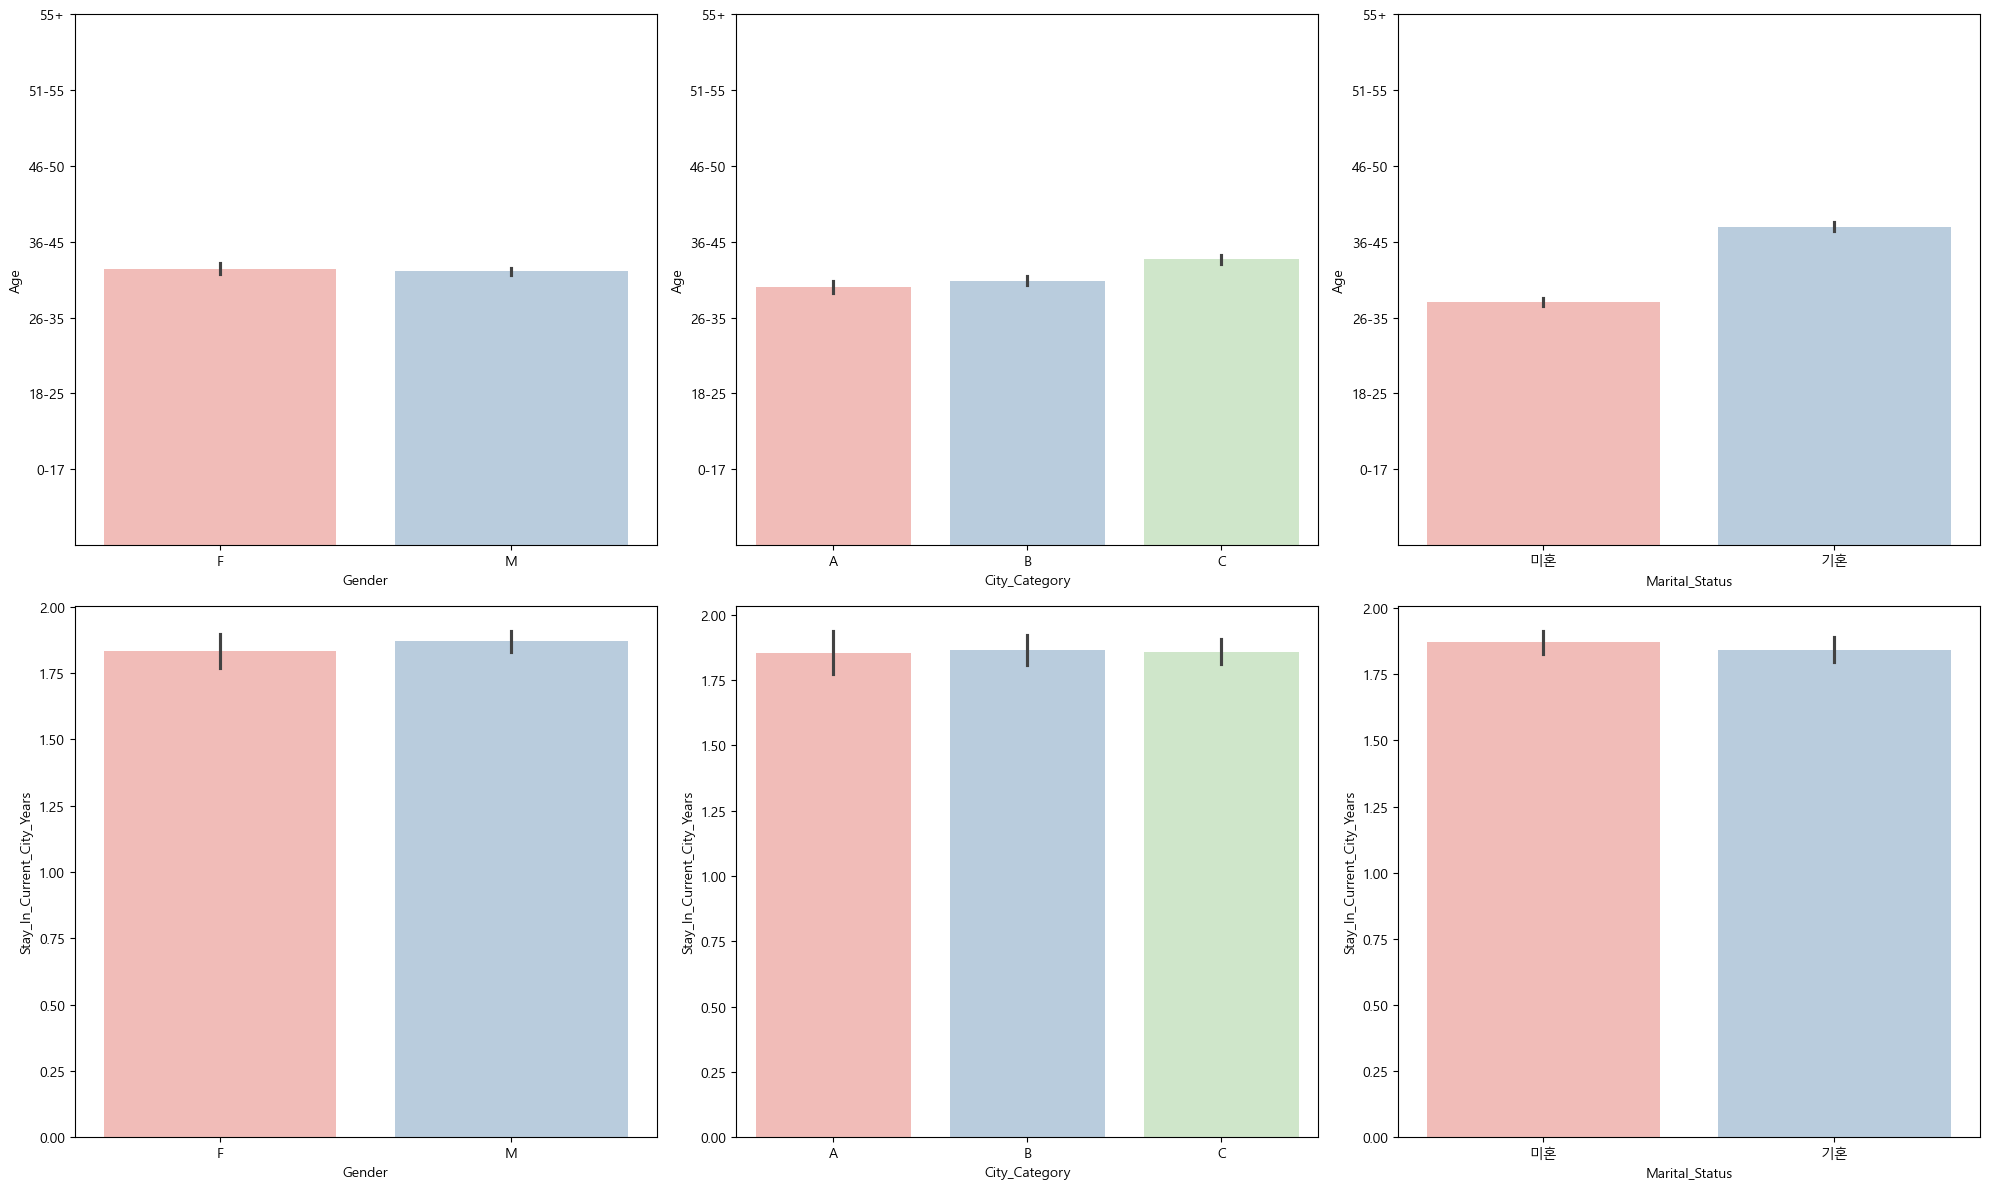

In [61]:
# 연령별 평균값을 보기 위해서 나이 기준을 int값으로 치환하는 데이터프레임 만들기
df_uniq_age = df_uniq.copy()
df_uniq_age['Age'] = df_uniq['Age'].replace({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})

bar, ax = plt.subplots(2, 3, figsize=(20, 12))

# Age를 포함하는 그래프들에 대해 y축 설정을 수정
age_plots = [ax[0,0], ax[0,1], ax[0,2]]

sns.barplot(data=df_uniq_age, x='Gender', y='Age', estimator=np.mean, ax=ax[0,0], palette='Pastel1')
sns.barplot(data=df_uniq_age, x='Gender', y='Stay_In_Current_City_Years', estimator=np.mean, ax=ax[1,0], palette='Pastel1')
sns.barplot(data=df_uniq_age, x='City_Category', y='Age', estimator=np.mean, ax=ax[0,1], palette='Pastel1', order=['A','B','C'])
sns.barplot(data=df_uniq_age, x='City_Category', y='Stay_In_Current_City_Years', estimator=np.mean, ax=ax[1,1], palette='Pastel1', order=['A','B','C'])
sns.barplot(data=df_uniq_age, x='Marital_Status', y='Age', estimator=np.mean, ax=ax[0,2], palette='Pastel1')
ax[0,2].set_xticks([0, 1])
ax[0,2].set_xticklabels(['미혼', '기혼'])
sns.barplot(data=df_uniq_age, x='Marital_Status', y='Stay_In_Current_City_Years', estimator=np.mean, ax=ax[1,2], palette='Pastel1')
ax[1,2].set_xticks([0, 1])
ax[1,2].set_xticklabels(['미혼', '기혼'])
# Age 그래프들의 y축 설정
for axis in age_plots:
    axis.set_yticks([1, 2, 3, 4, 5, 6, 7])
    axis.set_yticklabels(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])

plt.tight_layout()
plt.show()

1. 성별 간 연령과 각각의 도시에 지낸 기간의 평균은 거의 비슷하다.
2. C 도시가 다른 두 도시에 비해 연령대가 있는 편이고 3도시 모두 각각의 도시에서 지낸 기간의 평균이 비슷하다.
3. 기혼인 회원의 연령대가 미혼인 회원보다 유의미하게 많은 편이고 미혼, 기혼 회원 모두 각각의 도시에서 지낸 기간의 평균이 비슷하다.

In [68]:
df_uniq = df.copy()
df_uniq = df_uniq[['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']]
df_uniq = df_uniq.drop_duplicates()

df_uniq['Stay_In_Current_City_Years'] = df_uniq['Stay_In_Current_City_Years'].replace('4+', 4)
df_uniq['Stay_In_Current_City_Years'] = df_uniq['Stay_In_Current_City_Years'].astype(int)

df_uniq_index = df_uniq.set_index('User_ID')

df_purchase = df.copy()
df_purchase = df_purchase[['User_ID','Purchase']]
df_purchase.groupby('User_ID').sum()

df_uniq_index['Purchase'] = df_purchase.groupby('User_ID').sum()
df_uniq_index

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
User_ID,,,,,,,
1000001,F,0-17,10,A,2,0,334093
1000002,M,55+,16,C,4,0,810472
1000003,M,26-35,15,A,3,0,341635
1000004,M,46-50,7,B,2,1,206468
1000005,M,26-35,20,A,1,1,821001
...,...,...,...,...,...,...,...
1004588,F,26-35,4,C,0,0,140990
1004871,M,18-25,12,C,2,0,108545
1004113,M,36-45,17,C,3,0,213550


# 5번 차트

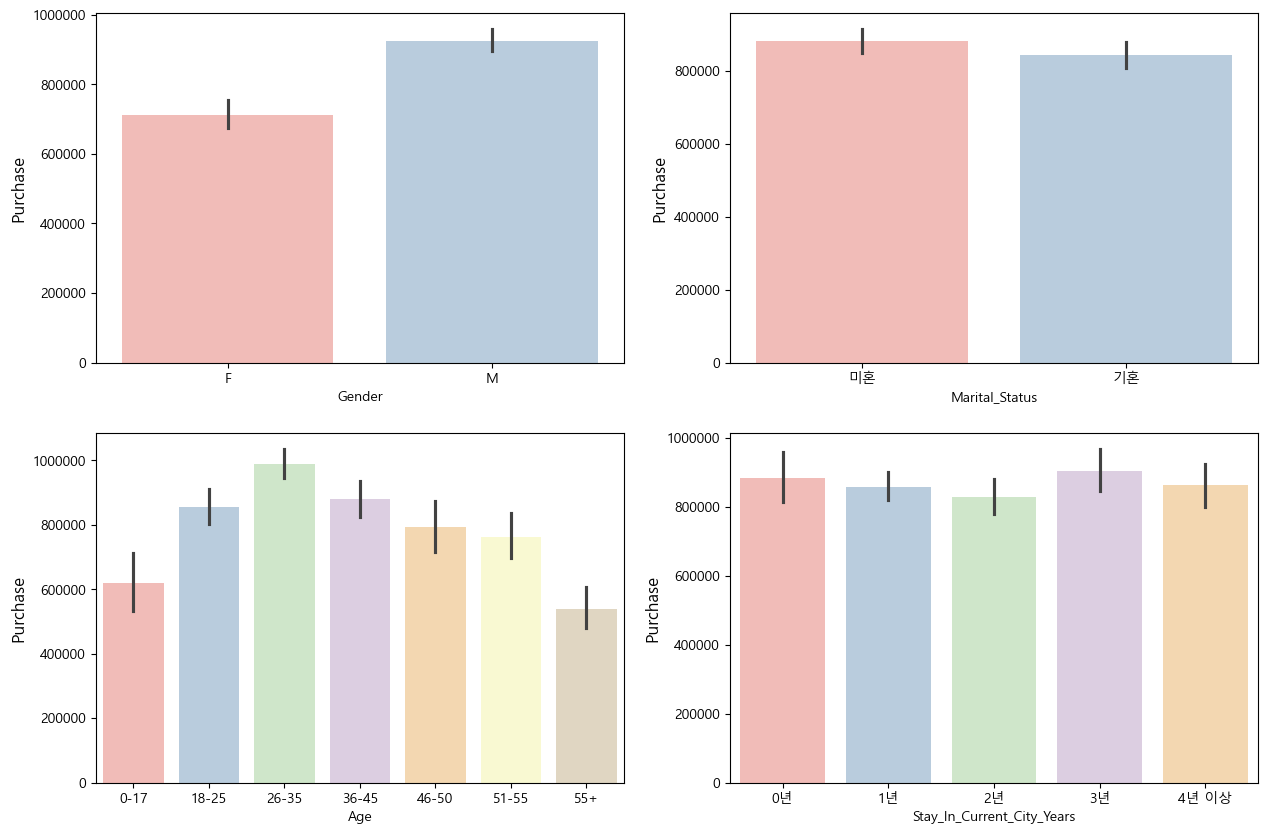

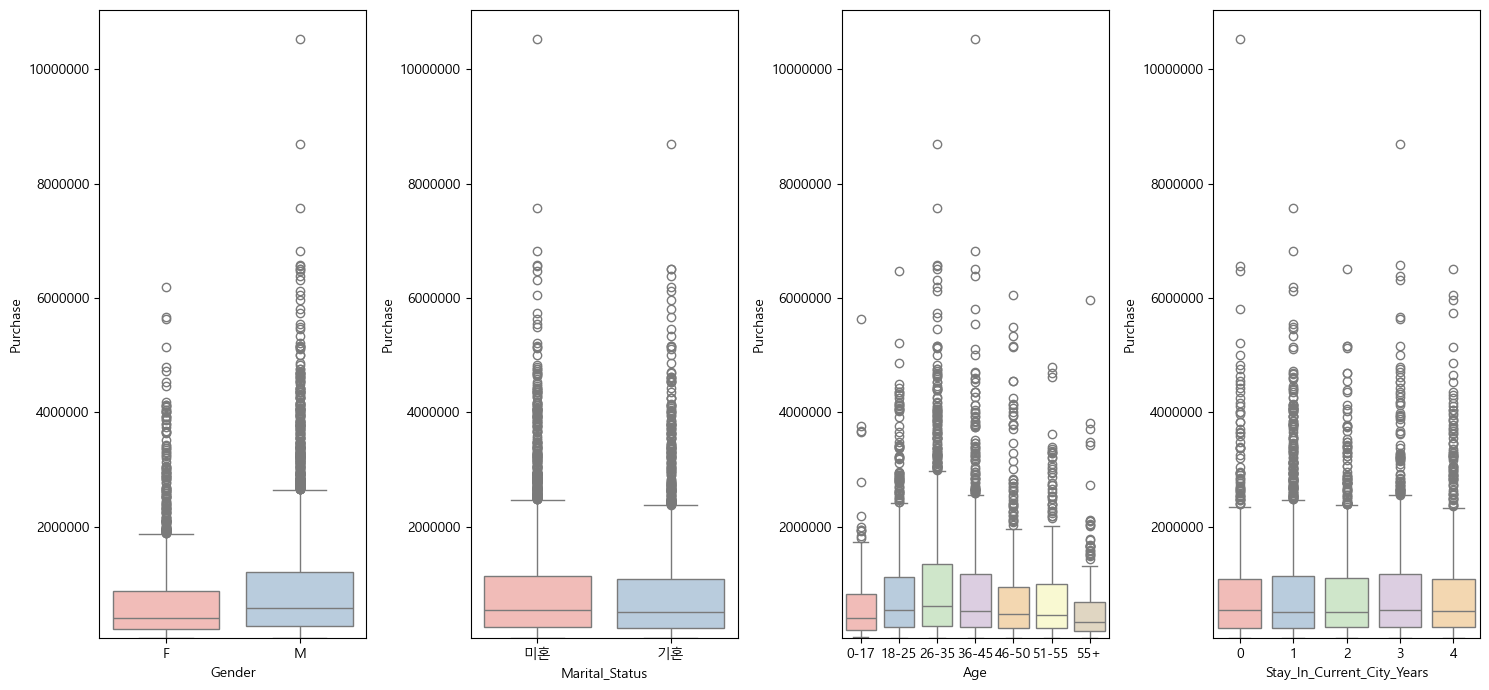

In [79]:
bar, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(data=df_uniq_index, x='Age', y='Purchase', estimator=np.mean, ax=ax[1,0], palette='Pastel1', order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
sns.barplot(data=df_uniq_index, x='Gender', y='Purchase', estimator=np.mean, ax=ax[0,0], palette='Pastel1')
sns.barplot(data=df_uniq_index, x='Marital_Status', y='Purchase', estimator=np.mean, ax=ax[0,1], palette='Pastel1')
sns.barplot(data=df_uniq_index, x='Stay_In_Current_City_Years', y='Purchase', estimator=np.mean, ax=ax[1,1], palette='Pastel1')

ax[0,1].set_xticks([0, 1])
ax[0,1].set_xticklabels(['미혼', '기혼'])

ax[1,1].set_xticks([0, 1, 2, 3, 4])
ax[1,1].set_xticklabels(['0년', '1년', '2년', '3년', '4년 이상'])

def format_func(value, tick_number):
    return int(value)

for i in range(2):
    for j in range(2):
        ax[i,j].yaxis.set_major_formatter(plt.FuncFormatter(format_func))
        ax[i,j].set_ylabel('Purchase', fontsize=12)
        
plt.show()

box, ax = plt.subplots(1, 4, figsize=(15, 7))
sns.boxplot(data=df_uniq_index, x='Gender', y='Purchase', ax=ax[0], palette='Pastel1')
sns.boxplot(data=df_uniq_index, x='Marital_Status', y='Purchase', ax=ax[1], palette='Pastel1')
sns.boxplot(data=df_uniq_index, x='Age', y='Purchase', ax=ax[2], palette='Pastel1', order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
sns.boxplot(data=df_uniq_index, x='Stay_In_Current_City_Years', y='Purchase', ax=ax[3], palette='Pastel1')
def format_func(value, tick_number):
    return int(value)
for a in ax:
    a.set_ylim(df_uniq_index['Purchase'].min(), df_uniq_index['Purchase'].max()+500000)
    a.yaxis.set_major_locator(plt.AutoLocator())
    a.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['미혼', '기혼'])

box.set_tight_layout(True)
plt.show()

1. 남성 개개인의 평균 구매력이 여성보다 높은 것으로 보임
2. 미혼인 회원이 더 많았지만 개개인의 평균 구매력은 기혼인 회원과 크게 차이나지 않는 것을 알 수 있다
3. 평균적으로 26-35세의 구매력이 가장 높고 55세 이상과 0-17세의 구매력이 가장 낮은편
4. 도시에 지낸 기간에 개개인의 평균적인 구매력에 크게 영향을 미치지 않는 것으로 추정

# 6번차트

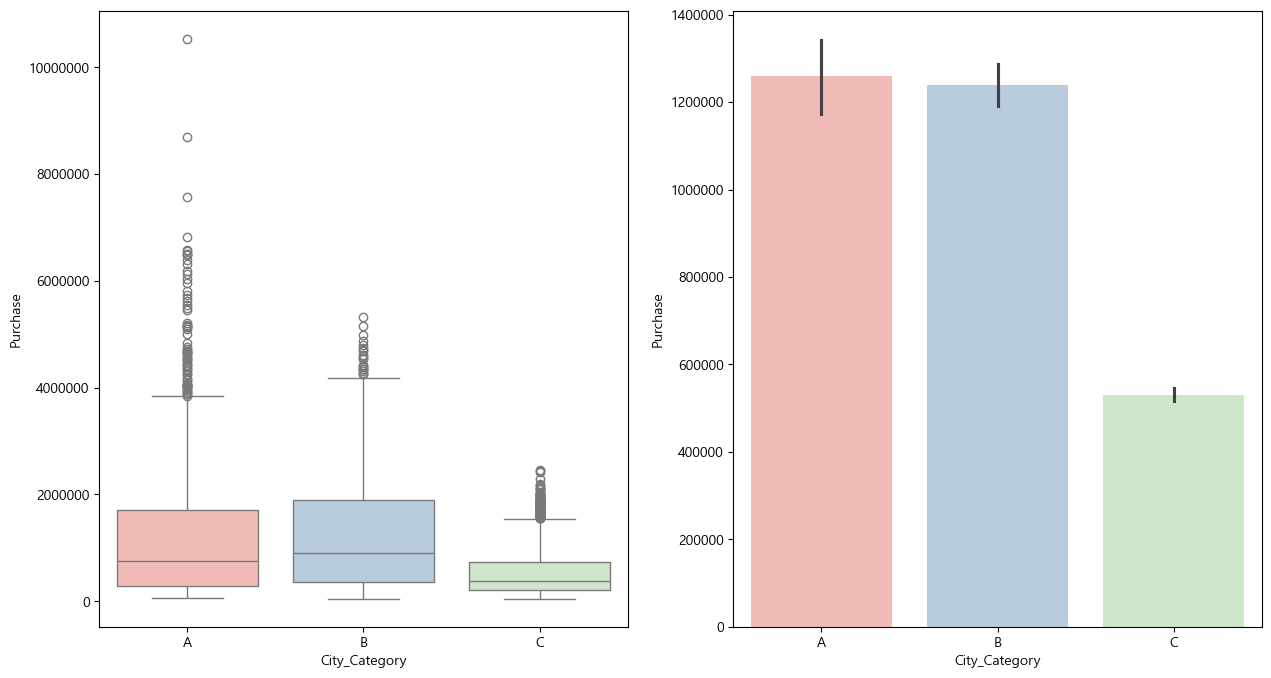

In [21]:
box, ax = plt.subplots(1,2,figsize=(15, 8))
sns.boxplot(data=df_uniq_index, x='City_Category', y='Purchase', palette='Pastel1', order=['A','B','C'], ax = ax[0])
sns.barplot(data=df_uniq_index, x='City_Category', y='Purchase', estimator=np.mean, palette='Pastel1', order=['A','B','C'], ax = ax[1])
def format_func(value, tick_number):
    return int(value)
for a in ax:
    # a.set_ylim(df_uniq_index['Purchase'].min(), df_uniq_index['Purchase'].max()+500000)
    a.yaxis.set_major_locator(plt.AutoLocator())
    a.yaxis.set_major_formatter(plt.FuncFormatter(format_func))


plt.show()

# 7번차트

Stay_In_Current_City_Years      0      1      2      3     4+
City_Category                                                
A                           24178  49305  27114  24804  22319
B                           28687  83413  41772  42691  34610
C                           21533  61103  32952  27790  27797


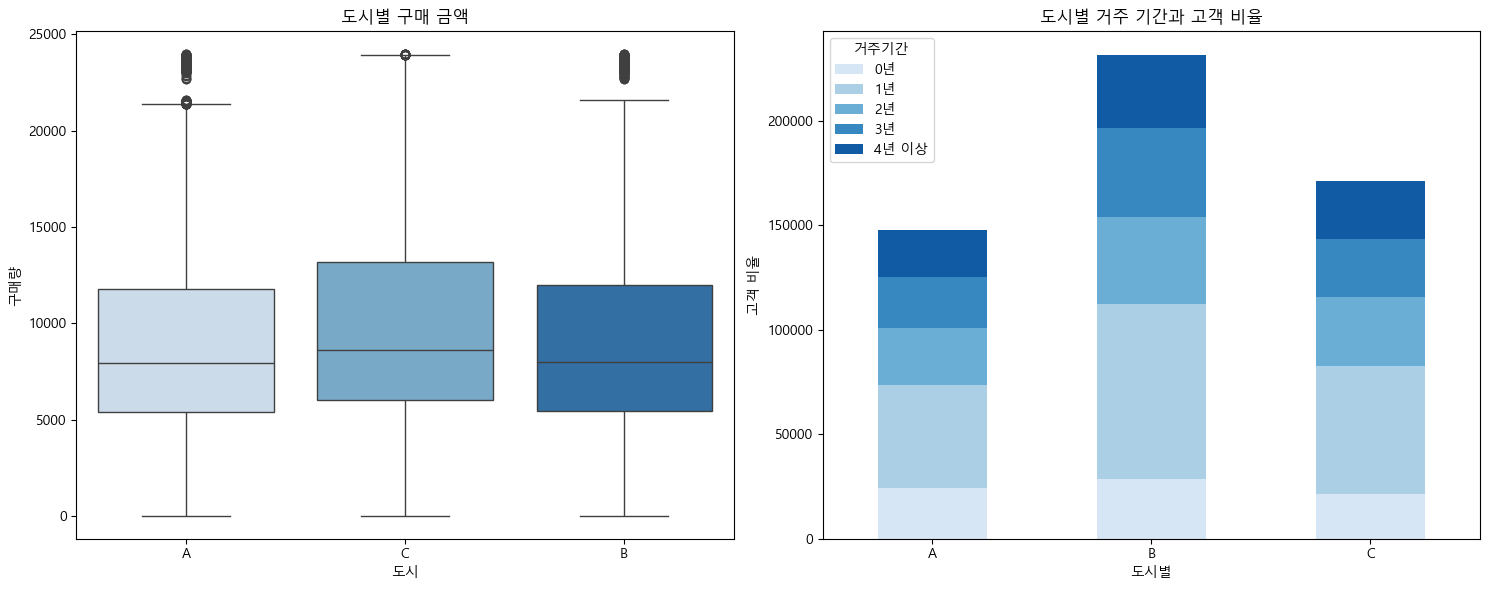

In [28]:


plt.figure(figsize=(15, 6))

# 첫 번째 서브플롯 - 박스 플롯
plt.subplot(1, 2, 1)
sns.boxplot(x='City_Category', y='Purchase', data=df, palette="Blues")
plt.title("도시별 구매 금액")
plt.xlabel("도시")
plt.ylabel("구매량")
### [박성훈] : 이렇게 그리면 매번 구매하는 경우마다의 도시와 구매금액에 대한 박스차트기 때문에 이렇게 그리는게 틀리지 않나요? 


# 두 번째 서브플롯 - 누적 막대 그래프
plt.subplot(1, 2, 2)
df_grouped = df.groupby(['City_Category', 'Stay_In_Current_City_Years']).size().unstack().fillna(0)
df_grouped.plot(kind='bar', stacked=True, ax=plt.gca(), color=sns.color_palette("Blues", n_colors=len(df_grouped.columns)))
plt.title("도시별 거주 기간과 고객 비율")
plt.xlabel("도시별")
plt.ylabel("고객 비율")
plt.xticks(rotation=0)
plt.legend(title='거주기간', labels=['0년', '1년', '2년', '3년', '4년 이상'], loc='upper left')
### 이것도 위의 차트와 마찬가지로 User ID가 중복이라 원하는 바를 나타내는게 아니지 않을까 싶은데

print(df_grouped)

plt.tight_layout()
plt.show()


# 8번차트

Stay_In_Current_City_Years    0     1    2    3    4
City_Category                                       
A                           147   370  183  180  165
B                           211   608  342  295  251
C                           414  1108  620  504  493


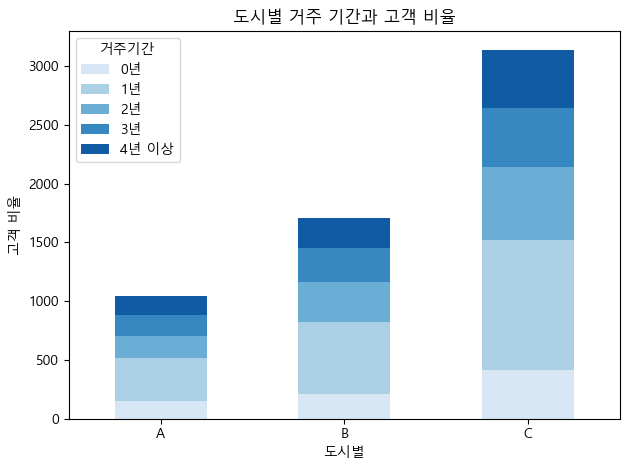

In [80]:
# 위의 7번 차트에서 1번 그림은 6번 차트의 1번 그림으로 대체된다고 생각하고
# 위의 7번 차트의 2번 그림을 대체하는 것을 8번 차트로 그려봄

df_grouped = df_uniq.groupby(['City_Category', 'Stay_In_Current_City_Years']).size().unstack().fillna(0)
df_grouped.plot(kind='bar', stacked=True, ax=plt.gca(), color=sns.color_palette("Blues", n_colors=len(df_grouped.columns)))
plt.title("도시별 거주 기간과 고객 비율")
plt.xlabel("도시별")
plt.ylabel("고객 비율")
plt.xticks(rotation=0)
plt.legend(title='거주기간', labels=['0년', '1년', '2년', '3년', '4년 이상'], loc='upper left')

print(df_grouped)

plt.tight_layout()
plt.show()

### 5. 도시별 거주기간별 고객 비율
1. C도시의 회원이 가장 많으므로 이에 마케팅 전략을 강화할 수 있다. 해당 지역에 맞는 맞춤형 프로모션이나 상품 구성을 고려.
2. 도시3(C)와 다르게 도시1,2(A,B)는 이상치가 많은데, 이는 도시 A,B에는 고소득 소비자들이 고급 제품에 대한 수요가 높다는 것을 의미, C도시는 소비패턴이 전반적으로 안정적임.
3. 모든 도시에 새롭게 유입된 고객이 많은 점을 활용해, 신규 고객을 타겟으로 한 초기 할인 및 멤버십 혜택, 제품군 선정 같은 전략을 도입하면 효과적일 듯.
4. 특히 C 도시의 회원이 가장 많음에도 불구하고 (대도시이고 방문할 수 있는 고객이 가장 많고 가장 유망한 시장임에도 불구하고) 구매력이 가장 떨어짐. **==> 6번 차트에서 확인 가능**
5. C 도시에 거주기간이 0년과 1년인 회원의 수가 다른 도시와 맞먹을 정도로 많고, 회원 수가 가장 많음에도 구매력 상위 300인 VIP와 상위 30인 VVIP에는 한 명도 없다. **==> 12번차트에서 확인가능**
6. 따라서 기존에 존재하는 회원이 많으나 구매력이 떨어지는 C도시를 통해서는 구매력을 강화하는 프로모션을, A나 B도시에는 신규 회원 유입을 강화하는 프로모션을 진행하는 것이 괜찮아 보임.

# 9번차트

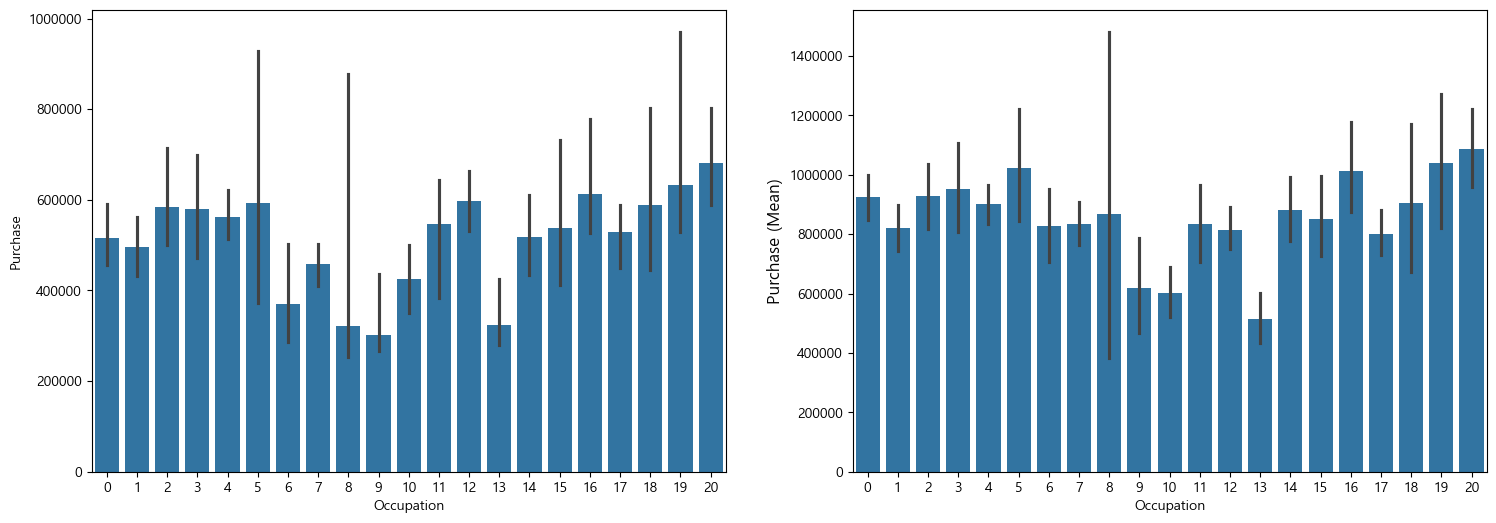

In [24]:
hist, ax = plt.subplots(1,2, figsize=(18, 6))
sns.barplot(data=df_uniq_index, x='Occupation', y='Purchase', estimator=np.median, ax=ax[0])
plt.ylabel('Purchase (Median)', fontsize=12)


sns.barplot(data=df_uniq_index, x='Occupation', y='Purchase', estimator=np.mean, ax=ax[1])
def format_func(value, tick_number):
    return int(value)
for a in ax:
    # a.set_ylim(df_uniq_index['Purchase'].min(), df_uniq_index['Purchase'].max()+500000)
    a.yaxis.set_major_locator(plt.AutoLocator())
    a.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.ylabel('Purchase (Mean)', fontsize=12)
plt.show()

# Walmart 직업별 구매량 차이

1. 직업별 소득이 크게 차이나 구매력에도 큰 편차가 있을 것으로 예상했기 때문에 median 값으로 보기도 함.
2. 20번 직업의 구매력이 가장 뛰어남
3. 9번과 13번의 구매력이 가장 낮음
4. 8번의 구매력이 편차가 가장 심한 것으로 보임


# 10번차트

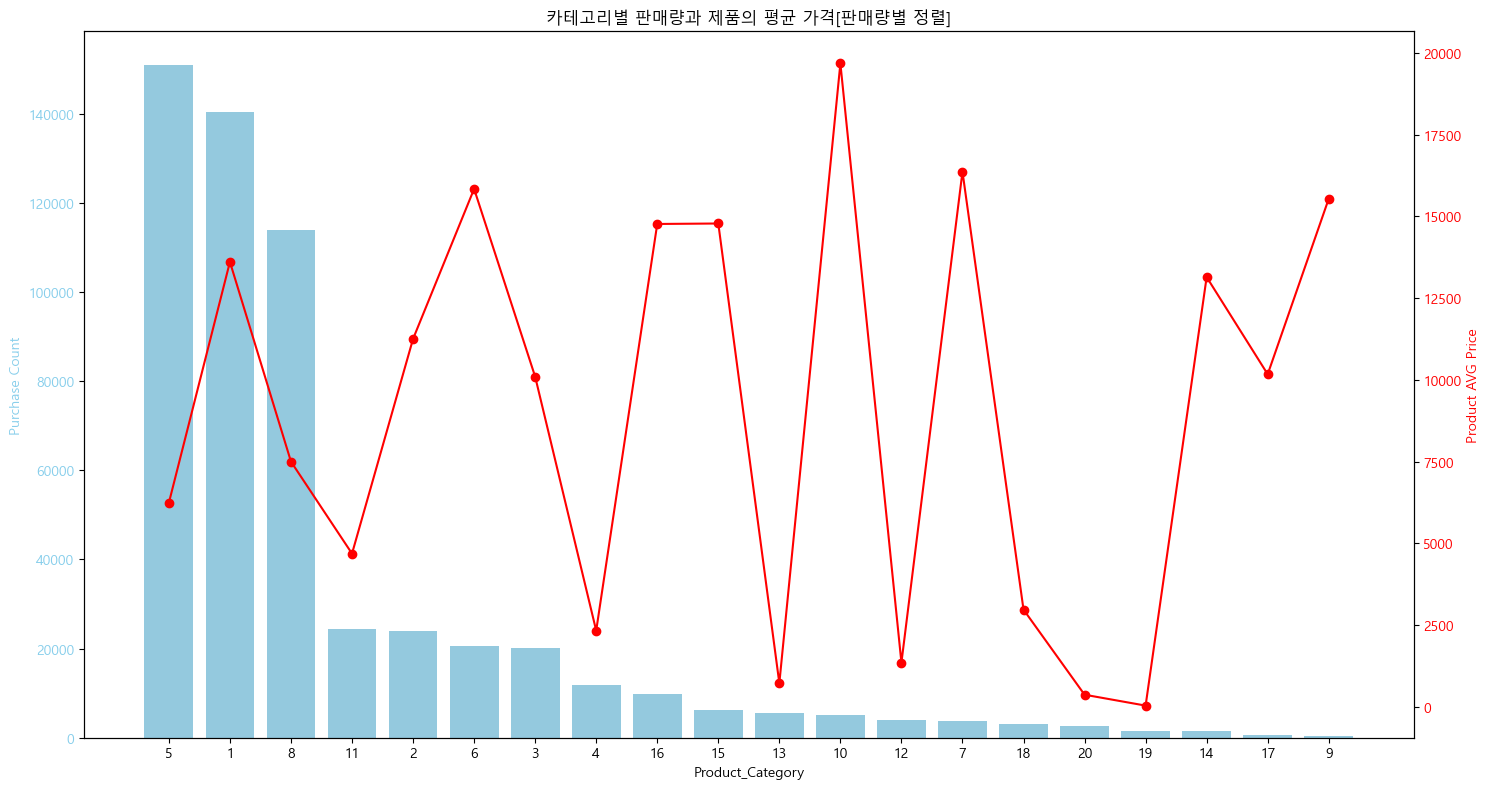

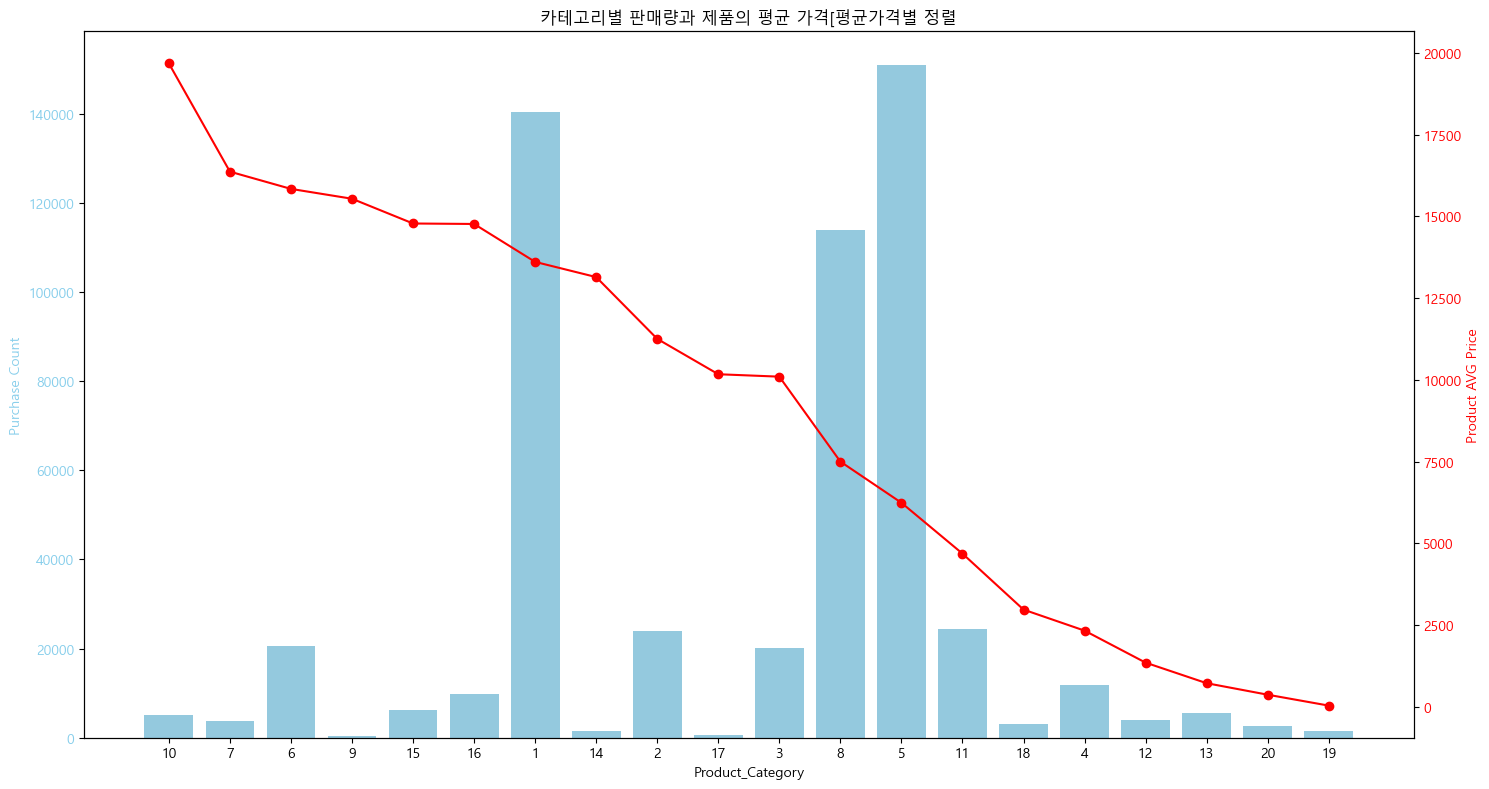

In [27]:
# 제품 카테고리별 구매금액 합산 데이터프레임 생성
df_purchase_category = df.copy()
category_purchase_sum = df_purchase_category.groupby('Product_Category')['Purchase'].sum().reset_index()

# 제품 카테고리별 구매 횟수와 총 구매금액 합치는 데이터 프레임 생성
product_df = pd.merge(category_purchase_sum, df.Product_Category.value_counts().reset_index(), on='Product_Category')
product_df.columns = ['Product_Category', 'Purchase', 'Purchase_Count']
product_df['Product_AVG_Price'] = product_df.Purchase / product_df.Purchase_Count

def plot_count_with_avg_price(df, sort_by, title):
    # 데이터 정렬 후 역순으로 뒤집기
    df_sorted = df.sort_values(by=sort_by, ascending=False).reset_index(drop=True)
    # df_sorted = df_sorted.iloc[::-1].reset_index(drop=True)
    
    fig, ax1 = plt.subplots(figsize=(15, 8))
    
    # Purchase_Count 막대 그래프
    sns.barplot(x='Product_Category', y='Purchase_Count', data=df_sorted, order=df_sorted['Product_Category'], ax=ax1, color='skyblue')
    
    # 왼쪽 y축 레이블 설정
    ax1.set_ylabel('Purchase Count', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')
    
    # 오른쪽 y축 생성
    ax2 = ax1.twinx()
    
    # Product_AVG_Price 선 그래프
    ax2.plot(range(len(df_sorted)), df_sorted['Product_AVG_Price'], color='red', marker='o')
    ax2.set_ylabel('Product AVG Price', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # x축 아래에 Product_Category 표시
    ax1.set_xticks(range(len(df_sorted)))
    ax1.set_xticklabels([f'{cat}' for cat in df_sorted['Product_Category']])
    
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Purchase_Count 순으로 정렬된 차트
plot_count_with_avg_price(product_df, 'Purchase_Count', '카테고리별 판매량과 제품의 평균 가격[판매량별 정렬]')

# Product_AVG_Price 순으로 정렬된 차트
plot_count_with_avg_price(product_df, 'Product_AVG_Price', '카테고리별 판매량과 제품의 평균 가격[평균가격별 정렬')

1. 구매 횟수로 봤을 때 5번 1번 8번 상품 카테고리가 가장 많았고, 5,1,8은 생필품으로 추정됨
2. 전체 구매 금액에서 구매 횟수로 나눈 제품 카테고리의 평균 가격으로 봤을 때 10,7이 가장 높으면서 구매 횟수는 낮았기 때문에 10번과 7번은 사치품으로 추정

# Walmart 제품 카테고리별 판매액 분석

 **주요 매출 카테고리**
   - **카테고리 1**이 다른 모든 제품군을 압도하며 가장 높은 매출을 기록했으며 그 수요가 매우 강함을 알 수 있었으며 **카테고리 5**와 **카테고리 8**이 그 뒤를 이어 높은 매출을 차지, 해당 제품군이 가장 인기가 많았으며 생필품으로 추정.

   - **그 외 카테고리**는 1,5,8 카테고리에 비해 현저히 적은 매출 성과만을 보이는 중인 것으로 보임. 단순히 수요가 낮은 제품이 아니라면 제품의 인지도, 마케팅의 부족함인지 확인하고 추가적인 조치를 고안해봐야 할듯
   - 전체 구매 금액에서 구매 횟수로 나눈 제품 카테고리의 평균 가격으로 봤을 때 **10,7이 가장 높으면서 구매 횟수는 낮았기 때문에 10번과 7번은 사치품으로 추정**

   - **최종적으로** 그 방향성을 구체화하기 위해 제품 카테고리 별로 어떠한 유형의 고객들이 있는지 파악해 실질적인 개선 방안을 모색하고자 함. 

# 11번차트

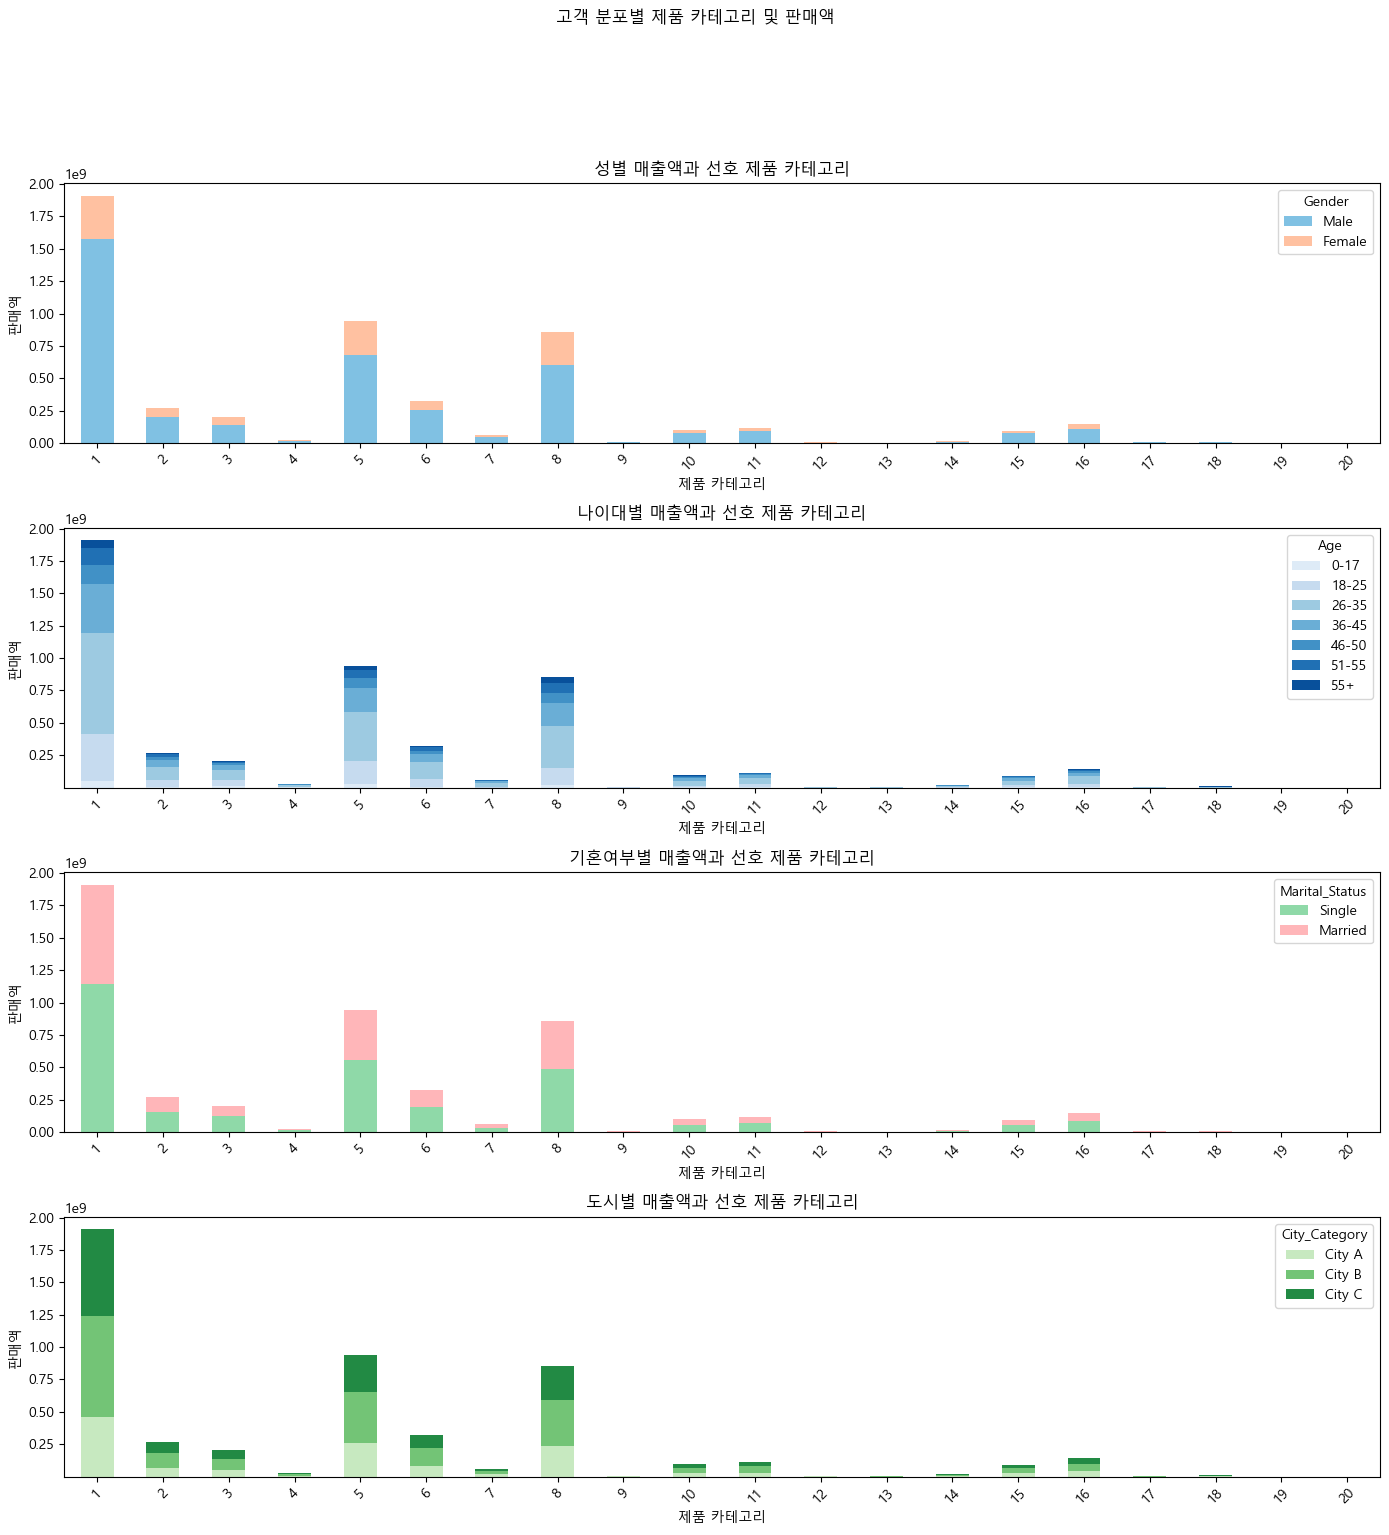

In [32]:
# 고객별 정보( : 성별, 기혼 여부, 지역별, 나이 그룹)에 따른 매출 분석을 위한 그룹 리스트
group_by_list = [
    ('Gender', ['#80C1E3', '#FFC1A1'], "성별 매출액과 선호 제품 카테고리", ["Male", "Female"]),
    ('Age', sns.color_palette("Blues", n_colors=7), "나이대별 매출액과 선호 제품 카테고리", ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"]),
    ('Marital_Status', ['#8FD9A8', '#FFB6B9'], "기혼여부별 매출액과 선호 제품 카테고리", ["Single", "Married"]),
    ('City_Category', sns.color_palette("Greens", n_colors=3), "도시별 매출액과 선호 제품 카테고리", ["City A", "City B", "City C"])

]

# 그림 크기 설정 및 서브플롯 생성
fig, axs = plt.subplots(len(group_by_list), 1, figsize=(14, 15)) #가로로 길게 하여 단번에 파악할 수 있게끔 가시성을 높임
fig.suptitle("고객 분포별 제품 카테고리 및 판매액", y=1.02)

# 각 그룹별 누적 막대 그래프 생성, 이때 그래프에 입력될 라벨값들을 위에서 생성한 리스트의 튜플 요소들 값으로 불러옴
for i, (group, colors, title, legend_labels) in enumerate(group_by_list):

    df.groupby(['Product_Category', group])['Purchase'].sum().unstack().fillna(0).plot(kind='bar', stacked=True, color=colors, ax=axs[i], legend=False)
    # 누적 막대 그래프, 순서대로 해석하면 우선 그룹화 시켜 이를  sum하여 행을 열로 변환*unstack시켜 결측치를 제거한다. 즉 하나의 막대를 쪼개는 역할
    axs[i].set_title(title) #타이들을 변수로 받아옴
    axs[i].set_xlabel("제품 카테고리")
    axs[i].set_ylabel("판매액")
    axs[i].tick_params(axis='x', rotation=45)
    
    # 범례를 설정해 그래프의 가시성을 높임
    handles, _ = axs[i].get_legend_handles_labels() #그래프의 내용이 담긴 객체를 불러와 그래의 대한 것은 handles객체에 저장
    axs[i].legend(handles, legend_labels, title=group, loc='upper right') #해당 객체에 대해 범례를 리스트로 저장된 객체(legend_labels)로 불러와 표현

# 레이아웃 조정 및 그래프 표시
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Walmart 제품 카테고리별 매출 분석 (성별, 나이대, 기혼 여부, 도시별)

### 1. 성별 매출과 선호 제품 카테고리
  - **카테고리 1**에서 남성의 매출이 압도적으로 높으며, **카테고리 5와 8**에서도 남성이 높은 매출을 보임
  - 남성 고객을 대상으로 한 마케팅이 효과적일 가능성이 높으며, 여성 고객의 선호도가 상대적으로 높은 제품군과 여성이 선호하는 제품에 대한 확대가 필요해보임.

### 2. 나이대별 매출과 선호 제품 카테고리
  - **26-35세와 18-25세 고객이 Walmart의 주요 소비층**으로 보이며, 이들 연령대에 맞춘 상품 구성이 효과적일 수 있습니다. 특히, 26-35세 연령대는 주요 제품 카테고리에서 높은 매출을 보이고 있어 집중적인 마케팅이 필요합니다.

### 3. 기혼 여부에 따른 매출과 선호 제품 카테고리
  - **카테고리 1**과 **카테고리 5**에서 미혼 고객의 매출이 두드러지며, 이는 Walmart의 주요 매출을 차지하는 고객층이 미혼임을 시사
  - 미혼 고객을 위한 마케팅 전략이 효과적일 가능성이 높음. 기혼 고객이 선호하는 카테고리 8에 대해서는 가족 단위의 프로모션이나 혜택을 제공하면 매출에 도움이 될 것

### 4. 도시별 매출과 선호 제품 카테고리
- 도시 B를 중심으로 한 마케팅 전략이 유효할 가능성이 높음. 그러나 도시 A와 C도 상대적으로 큰 매출을 기록하고 있으므로, 이들 지역을 대상으로 한 맞춤형 캠페인도 고려하면 매출에 도움이 될 것
- C 도시의 구매력이 A와 B에 비해 약간 떨어지는 것으로 보인다. 

# 12번차트

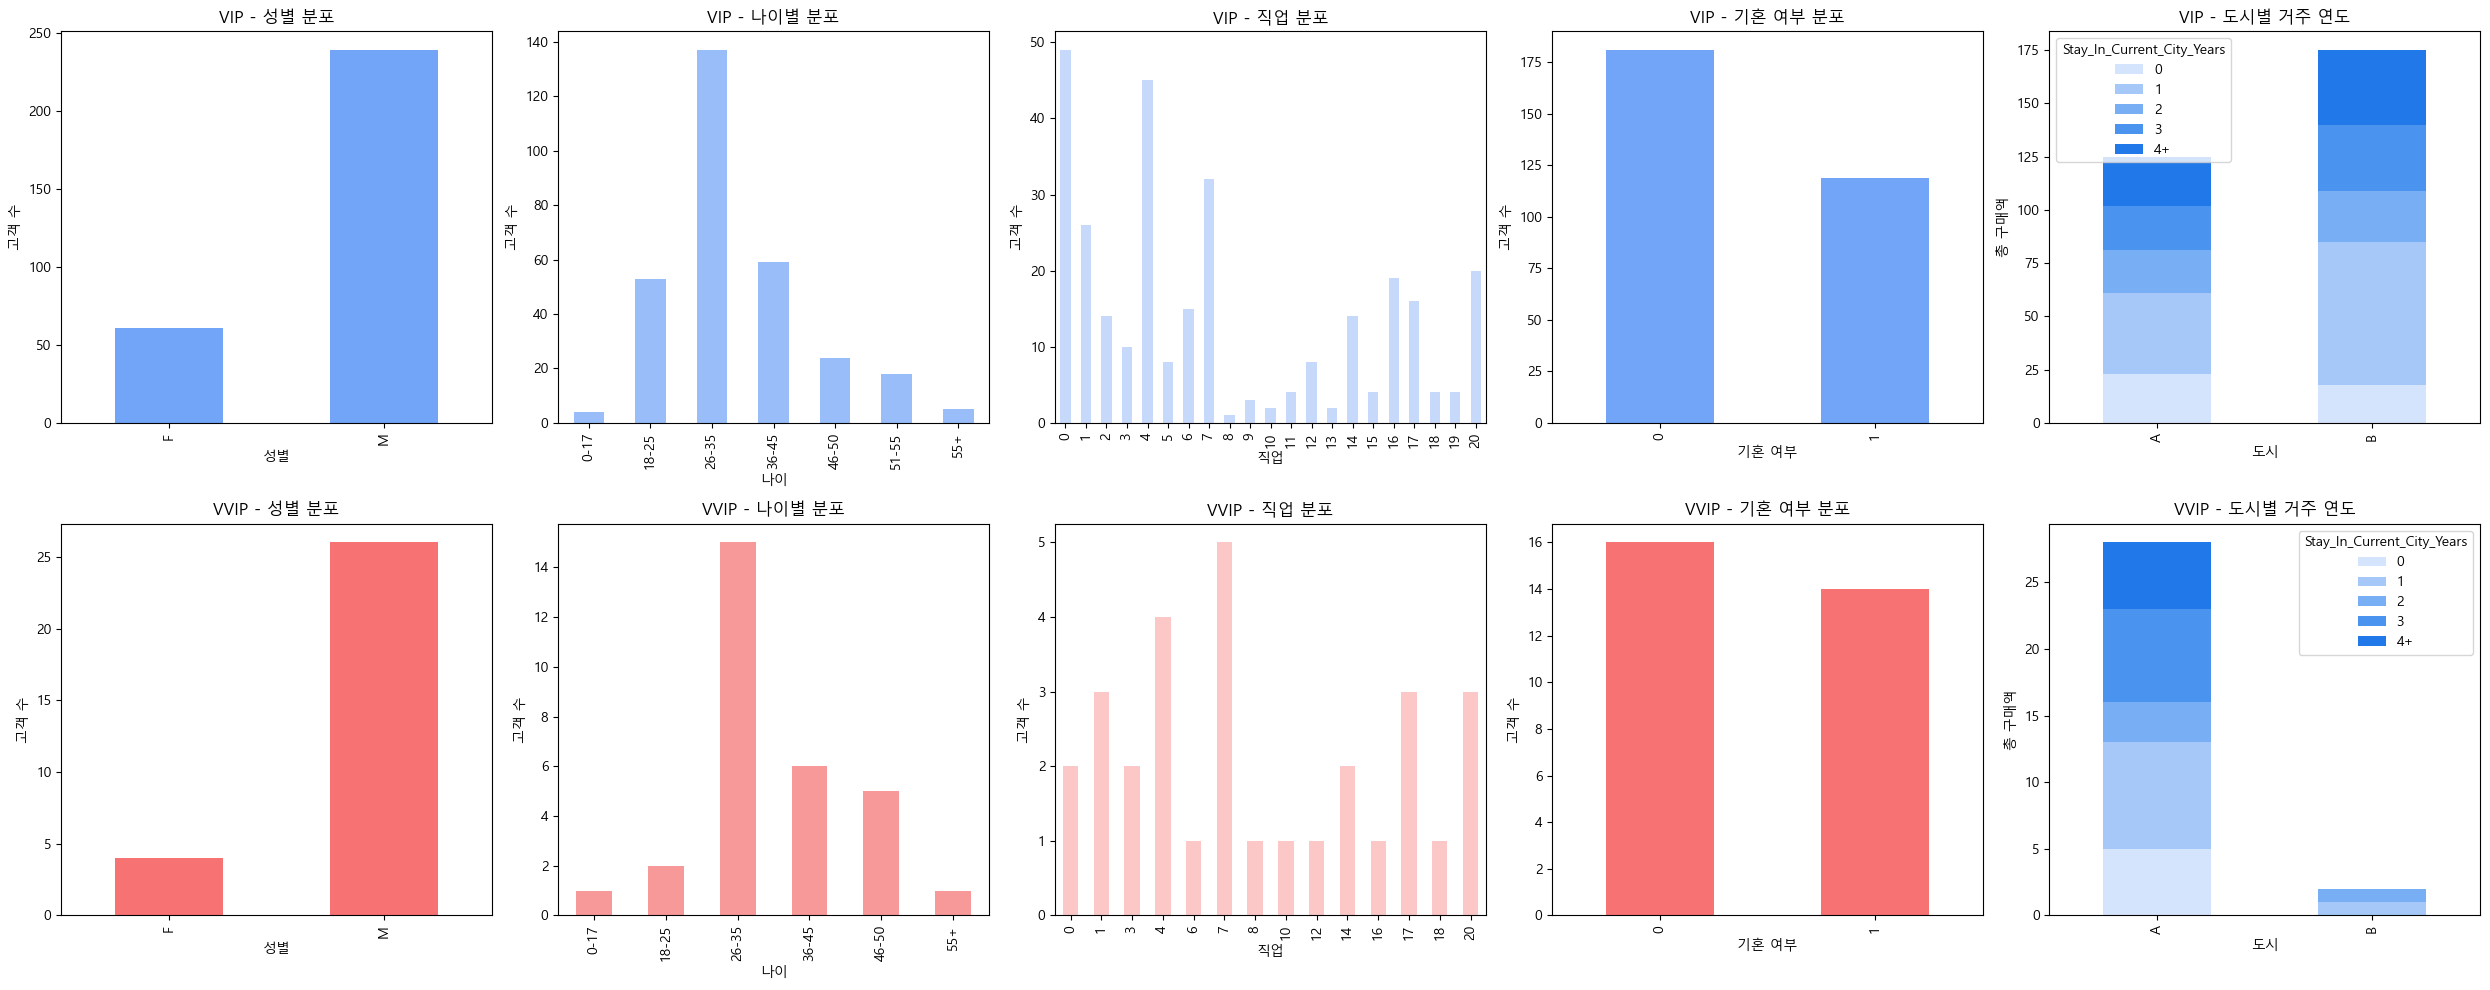

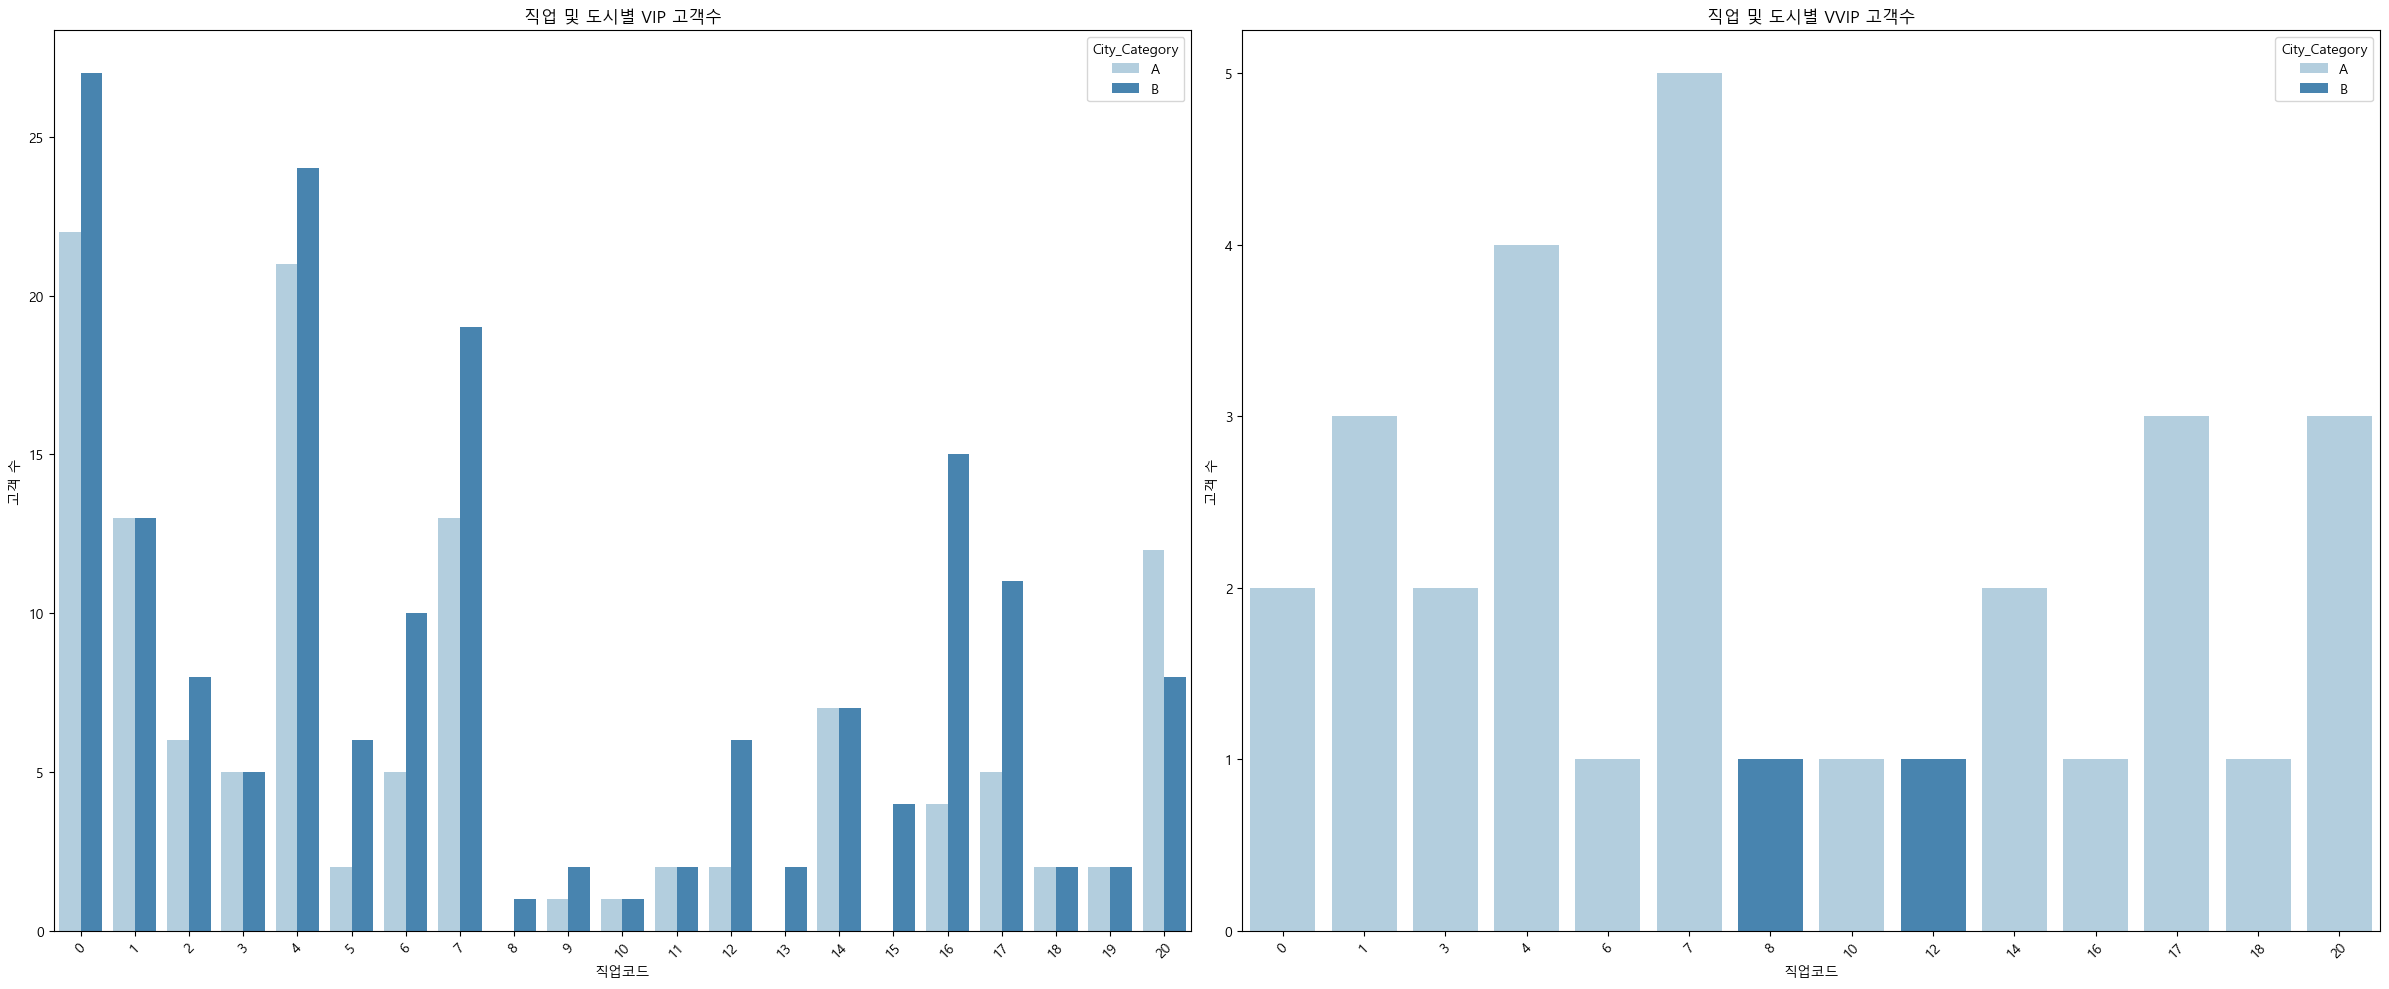

In [34]:
# [[추가!!]] 그래프를 그리기 위한 데이터 준비
attributes = ['Gender', 'Age', 'Occupation', 'Marital_Status', 'City_Category']
titles = ['성별', '나이', '직업', '기혼 여부', '도시']
vip_labels = ['VIP - 성별 분포', 'VIP - 나이별 분포', 'VIP - 직업 분포', 'VIP - 기혼 여부 분포', 'VIP - 도시별 거주 연도']
vvip_labels = ['VVIP - 성별 분포', 'VVIP - 나이별 분포', 'VVIP - 직업 분포', 'VVIP - 기혼 여부 분포', 'VVIP - 도시별 거주 연도']

fig, axs = plt.subplots(2, 5, figsize=(25, 10))

colors_vip = ["#72a4f7", "#99bdf9", "#c7d9fb"]
colors_vvip = ["#f77272", "#f79999", "#fbc7c7"]
stay_colors = ["#d4e4fc", "#a5c8f8", "#78aef4", "#4a94f0", "#2179e9"]

for idx, (attr, title) in enumerate(zip(attributes, titles)):
    if idx < 4:  # 첫 4개의 그래프는 기본 막대 그래프로 그림, 단순한 데이터 구조이기 때문에
        # VIP 분포 그래프
        vip_users[attr].value_counts().sort_index().plot(kind='bar', color=colors_vip[idx % len(colors_vip)], ax=axs[0, idx], title=vip_labels[idx])
        axs[0, idx].set_xlabel(title)
        axs[0, idx].set_ylabel("고객 수")

        # VVIP 분포 그래프
        vvip_users[attr].value_counts().sort_index().plot(kind='bar', color=colors_vvip[idx % len(colors_vvip)], ax=axs[1, idx], title=vvip_labels[idx])
        axs[1, idx].set_xlabel(title)
        axs[1, idx].set_ylabel("고객 수")
    else:  
        # VIP 도시별 거주 연도 누적 그래프
        vip_city_years = vip_users.groupby(['City_Category', 'Stay_In_Current_City_Years']).size().unstack().fillna(0)
        vip_city_years.plot(kind='bar', stacked=True, color=stay_colors, ax=axs[0, idx], title=vip_labels[idx])
        axs[0, idx].set_xlabel(title)
        axs[0, idx].set_ylabel("총 구매액")

        # VVIP 도시별 거주 연도 누적 그래프
        vvip_city_years = vvip_users.groupby(['City_Category', 'Stay_In_Current_City_Years']).size().unstack().fillna(0)
        vvip_city_years.plot(kind='bar', stacked=True, color=stay_colors, ax=axs[1, idx], title=vvip_labels[idx])
        axs[1, idx].set_xlabel(title)
        axs[1, idx].set_ylabel("총 구매액")

# 범례 위치 조정
plt.tight_layout()
plt.show()

# 직업 분포별 VIP와 VVIP 고객 수 차트에 고객들이 사는 지역 추가
grouped_vip = vip_users.groupby(['Occupation', 'City_Category']).size().reset_index(name='Count')
grouped_vvip = vvip_users.groupby(['Occupation', 'City_Category']).size().reset_index(name='Count')

# 차트 그리기
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

sns.barplot(data=grouped_vip, x='Occupation', y='Count', hue='City_Category', ax=axes[0], palette='Blues')
axes[0].set_title('직업 및 도시별 VIP 고객수')
axes[0].set_xlabel('직업코드')
axes[0].set_ylabel('고객 수')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=grouped_vvip, x='Occupation', y='Count', hue='City_Category', ax=axes[1], palette='Blues')
axes[1].set_title('직업 및 도시별 VVIP 고객수')
axes[1].set_xlabel('직업코드')
axes[1].set_ylabel('고객 수')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Walmart고객중 VIP 및 VVIP 고객 분석

- **성별**: VIP와 VVIP 모두 남성이 더 많음. 
- **연령대**: VIP와 VVIP 모두 26-35세,36-45세가 가장 많았지만 VIP는 다음으로 18-25세가 많았으며 VVIP는 46-50세가 많았음.
- **직업**: VIP는 0번과 4번 직업이 가장 많고 8번 직업이 가장 적었으며 반대로 VVIP에선 7번 직업이 가장 많았음.
- **기혼 여부**: VIP와 VVIP 모두 미혼인 회원이 더 많음.
- **거주지**: VIP에선 B도시출신이 A도시 출신에 비해 많았으며 VVIP에선 A도시 출신이 B도시 출신에 비해 많았음.
  - A도시의 최상위 구매력이 상당한 것으로 추측, 반대로 C도시는 회원이 가장 많음에도 불구하고 구매력이 가장 떨어지는 것을 유추, C도시를 중심으로한 프로모션이 매출 향상에 실질적인 도움을 줄 수 있을 것으로 기대됨.
  - 따라서 C지역은 저렴한 가격대의 식료품과 기본 생필품, 대용량 PB 상품을 주력 판매상품으로 판매 상품 전략 변경함과 동시에 VIP 회원을 달성할시에 혜택을 주는 프로모션을 하여 구매력을 늘리는 방법도 괜찮아보임.
  -  A지역은 최상위 구매력을 갖는 VVIP고객 확보를 위해 선호 상품군에 대한 고급 브랜드 제품 입고 혹은 신제품 판매를 고려해볼만함